# Twitter Activities During Crises

Extract number of tweets and unique users per day along with various Twitter activities.
Then compare this frequency data with frequencies for relevant tweets.

In [1]:
// Add the spark analytics jar with my code for various counting capabilities
%AddJar file:/cliphomes/cbuntain/SparkTwitterAnalytics-1.0-SNAPSHOT.jar
%AddJar file:/cliphomes/cbuntain/.m2/repository/org/twitter4j/twitter4j-core/4.0.4/twitter4j-core-4.0.4.jar

Starting download from file:/cliphomes/cbuntain/SparkTwitterAnalytics-1.0-SNAPSHOT.jar
Finished download of SparkTwitterAnalytics-1.0-SNAPSHOT.jar
Starting download from file:/cliphomes/cbuntain/.m2/repository/org/twitter4j/twitter4j-core/4.0.4/twitter4j-core-4.0.4.jar
Finished download of twitter4j-core-4.0.4.jar


## Load Bokeh JAR files

Need to load a bunch of JAR files to use Bokeh-scala plotting library

In [2]:
%AddJar http://repo1.maven.org/maven2/org/spire-math/spire-macros_2.10/0.7.4/spire-macros_2.10-0.7.4.jar
%AddJar http://repo1.maven.org/maven2/com/typesafe/config/1.2.1/config-1.2.1.jar
%AddJar http://repo1.maven.org/maven2/com/typesafe/play/play-functional_2.10/2.3.10/play-functional_2.10-2.3.10.jar
%AddJar http://repo1.maven.org/maven2/org/scalanlp/breeze-macros_2.10/0.11.2/breeze-macros_2.10-0.11.2.jar
%AddJar http://repo1.maven.org/maven2/com/github/scala-incubator/io/scala-io-file_2.10/0.4.3/scala-io-file_2.10-0.4.3.jar
%AddJar http://repo1.maven.org/maven2/com/github/fommil/netlib/core/1.1.2/core-1.1.2.jar
%AddJar http://repo1.maven.org/maven2/org/slf4j/slf4j-api/1.7.5/slf4j-api-1.7.5.jar
%AddJar http://repo1.maven.org/maven2/com/typesafe/play/play-json_2.10/2.3.10/play-json_2.10-2.3.10.jar
%AddJar http://repo1.maven.org/maven2/com/jsuereth/scala-arm_2.10/1.3/scala-arm_2.10-1.3.jar
%AddJar http://repo1.maven.org/maven2/com/fasterxml/jackson/core/jackson-core/2.3.2/jackson-core-2.3.2.jar
%AddJar http://repo1.maven.org/maven2/org/joda/joda-convert/1.6/joda-convert-1.6.jar
%AddJar http://repo1.maven.org/maven2/io/continuum/bokeh/core_2.10/0.7/core_2.10-0.7.jar
%AddJar http://repo1.maven.org/maven2/joda-time/joda-time/2.8.1/joda-time-2.8.1.jar
%AddJar http://repo1.maven.org/maven2/net/sf/opencsv/opencsv/2.3/opencsv-2.3.jar
%AddJar http://repo1.maven.org/maven2/com/github/scala-incubator/io/scala-io-core_2.10/0.4.3/scala-io-core_2.10-0.4.3.jar
%AddJar http://repo1.maven.org/maven2/org/apache/commons/commons-math3/3.2/commons-math3-3.2.jar
%AddJar http://repo1.maven.org/maven2/junit/junit/4.8.2/junit-4.8.2.jar
%AddJar http://repo1.maven.org/maven2/com/github/rwl/jtransforms/2.4.0/jtransforms-2.4.0.jar
%AddJar http://repo1.maven.org/maven2/com/typesafe/play/play-datacommons_2.10/2.3.10/play-datacommons_2.10-2.3.10.jar
%AddJar http://repo1.maven.org/maven2/com/typesafe/play/play-iteratees_2.10/2.3.10/play-iteratees_2.10-2.3.10.jar
%AddJar http://repo1.maven.org/maven2/com/fasterxml/jackson/core/jackson-annotations/2.3.2/jackson-annotations-2.3.2.jar
%AddJar http://repo1.maven.org/maven2/io/continuum/bokeh/bokeh_2.10/0.7/bokeh_2.10-0.7.jar
%AddJar http://repo1.maven.org/maven2/com/fasterxml/jackson/core/jackson-databind/2.3.2/jackson-databind-2.3.2.jar
%AddJar http://repo1.maven.org/maven2/net/sourceforge/f2j/arpack_combined_all/0.1/arpack_combined_all-0.1.jar
%AddJar http://repo1.maven.org/maven2/io/continuum/bokeh/bokehjs_2.10/0.7/bokehjs_2.10-0.7.jar
%AddJar http://repo1.maven.org/maven2/org/spire-math/spire_2.10/0.7.4/spire_2.10-0.7.4.jar
%AddJar http://repo1.maven.org/maven2/org/scalanlp/breeze_2.10/0.11.2/breeze_2.10-0.11.2.jar

Starting download from http://repo1.maven.org/maven2/org/spire-math/spire-macros_2.10/0.7.4/spire-macros_2.10-0.7.4.jar
Finished download of spire-macros_2.10-0.7.4.jar
Starting download from http://repo1.maven.org/maven2/com/typesafe/config/1.2.1/config-1.2.1.jar
Finished download of config-1.2.1.jar
Starting download from http://repo1.maven.org/maven2/com/typesafe/play/play-functional_2.10/2.3.10/play-functional_2.10-2.3.10.jar
Finished download of play-functional_2.10-2.3.10.jar
Starting download from http://repo1.maven.org/maven2/org/scalanlp/breeze-macros_2.10/0.11.2/breeze-macros_2.10-0.11.2.jar
Finished download of breeze-macros_2.10-0.11.2.jar
Starting download from http://repo1.maven.org/maven2/com/github/scala-incubator/io/scala-io-file_2.10/0.4.3/scala-io-file_2.10-0.4.3.jar
Finished download of scala-io-file_2.10-0.4.3.jar
Starting download from http://repo1.maven.org/maven2/com/github/fommil/netlib/core/1.1.2/core-1.1.2.jar
Finished download of core-1.1.2.jar
Starting down

In [3]:
// Packages for Bokeh plotting
import io.continuum.bokeh.Plot
import io.continuum.bokeh.Grid
import io.continuum.bokeh.DatetimeTicker
import io.continuum.bokeh.Legend
import io.continuum.bokeh.Document
import io.continuum.bokeh.ColumnDataSource
import io.continuum.bokeh.DataRange1d
import io.continuum.bokeh.Circle
import io.continuum.bokeh.Line
import io.continuum.bokeh.GlyphRenderer
import io.continuum.bokeh.Color
import io.continuum.bokeh.DatetimeAxis
import io.continuum.bokeh.LinearAxis
import io.continuum.bokeh.PanTool
import io.continuum.bokeh.PreviewSaveTool
import io.continuum.bokeh.NumeralTickFormatter

In [4]:
// Packages for RDD manipulation
import org.apache.spark.rdd.RDD
import org.apache.spark.SparkContext
import org.apache.spark.SparkContext._

In [5]:
// Packages for Twitter JSON parsing
import twitter4j.Status
import twitter4j.TwitterObjectFactory

In [6]:
// My packages for calculating activity frequencies
import edu.umd.cs.hcil.spark.analytics.ActivityFrequency
import edu.umd.cs.hcil.spark.analytics.UniqueUserFrequency

In [7]:
// We're looking at daily activities
val timeScale : ActivityFrequency.TimeScale.Value = ActivityFrequency.TimeScale.DAILY

In [8]:
val targetFiles = "/collections/tweets/TweetsCrawl/us-west/2015-11/statuses.log.2015*.gz"
val twitterStrings = sc.textFile(targetFiles).repartition(3000)

// Convert each JSON line in the file to a status using Twitter4j
//  Note that not all lines are Status lines, so we catch any exception
//  generated during this conversion and set to null since we don't care
//  about non-status lines.'
val tweets = twitterStrings.map(line => {
    try {
      TwitterObjectFactory.createStatus(line)
    } catch {
      case e : Exception => null
    }
  }).filter(status => status != null)

val datedCounts = ActivityFrequency.activityCounter(tweets, timeScale)

In [9]:
val datedCountsMap = datedCounts.collectAsMap()

In [10]:
val timeScale : UniqueUserFrequency.TimeScale.Value = UniqueUserFrequency.TimeScale.DAILY
val datedUserCounts = UniqueUserFrequency.userCounter(tweets, timeScale)
val datedUserCountsMap = datedUserCounts.collectAsMap()

## Build Bokeh Plots

In [11]:
val eventTime = 1447446000000.0

object eventSource extends ColumnDataSource {
    val x = column(List(eventTime))
    val y = column(List(0.0d))
}

In [12]:
val dateList = datedCountsMap.keys.toList.sorted

object source extends ColumnDataSource {
    val dates = column(dateList.map(d => d.getTime.asInstanceOf[Double]))
    val tweets = column(dateList.map(d => datedCountsMap(d)._1.asInstanceOf[Double]))
    val rt    = column(dateList.map(d => datedCountsMap(d)._2.asInstanceOf[Double]))
    val ments = column(dateList.map(d => datedCountsMap(d)._3.asInstanceOf[Double]))
    val urls  = column(dateList.map(d => datedCountsMap(d)._4.asInstanceOf[Double]))
    val media = column(dateList.map(d => datedCountsMap(d)._5.asInstanceOf[Double]))
    val tags  = column(dateList.map(d => datedCountsMap(d)._6.asInstanceOf[Double]))
    val users = column(dateList.map(d => datedUserCountsMap(d).asInstanceOf[Double]))
}

In [13]:
val xdr = new DataRange1d()
val ydr = new DataRange1d()

val plot = new Plot().x_range(xdr).y_range(ydr)
plot.width(800)
plot.title("General Activity")

io.continuum.bokeh.Plot@6881f4ff

In [14]:
val dataList = List((source.tweets, Color.Black, "Tweets"), (source.rt, Color.Blue, "Retweets"), (source.ments, Color.Red, "Mentions"), (source.urls, Color.Yellow, "URLs"), (source.media, Color.Green, "Media"), (source.tags, Color.Orange, "Hashtags"), (source.users, Color.Cyan, "Users"))
var rendList = List[io.continuum.bokeh.GlyphRenderer]()
var legendList = List[(String, List[io.continuum.bokeh.GlyphRenderer])]()

for (dataTuple <- dataList) {
    val xData = source.dates
    val yData = dataTuple._1
    val color = dataTuple._2
    val name = dataTuple._3
    
    val line = new Line().x(xData).y(yData).line_color(color)
    val rendLine = new GlyphRenderer().data_source(source).glyph(line)
    
    rendList = rendList :+ rendLine
    legendList = legendList :+ (name -> List(rendLine))
}

val circle = new Circle().x(eventSource.x).y(eventSource.y).fill_color(Color.Red).size(10)
val eventCircle = new GlyphRenderer().data_source(eventSource).glyph(circle)
rendList = rendList :+ eventCircle
legendList = legendList :+ ("Event" -> List(eventCircle))

In [15]:
val xTick = new DatetimeTicker().desired_num_ticks(10)

val yForm = new NumeralTickFormatter()

val xaxis = new DatetimeAxis().ticker(xTick).plot(plot)
val yaxis = new LinearAxis().formatter(yForm).plot(plot)

val gridX = new Grid().plot(plot).dimension(0).ticker(xaxis.ticker.value)
val gridY = new Grid().plot(plot).dimension(1).ticker(yaxis.ticker.value)

plot.below <<= (xaxis :: _)
plot.left <<= (yaxis :: _)

In [16]:
val legend = new Legend().plot(plot).legends(legendList)

val pantool = new PanTool().plot(plot)
val previewTool = new PreviewSaveTool().plot(plot)

plot.renderers <<= (rendList ++ _)

plot.renderers <<= (xaxis :: yaxis :: gridX :: gridY :: _)
plot.renderers <<= (legend :: _)

plot.tools := List(pantool, previewTool)

val document = new Document(plot)


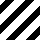
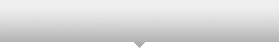
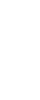
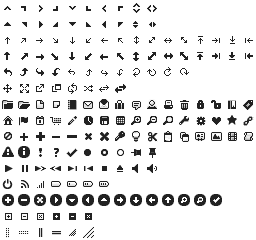
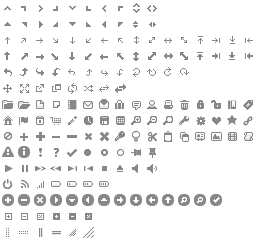
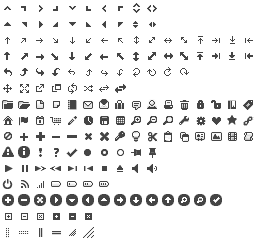
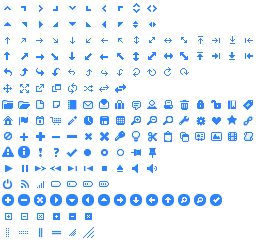
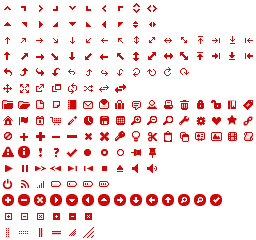
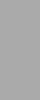
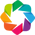
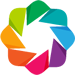
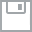
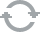
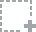
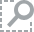
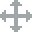
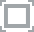
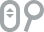

In [17]:
kernel.display.html(document.fragment.preamble.toString)

In [18]:
kernel.display.html(document.fragment.html.toString)

## Distribution Plots

Plot by percentage rather than volume.

In [19]:
val dateList = datedCountsMap.keys.toList.sorted

object distSource extends ColumnDataSource {
    val dates = column(dateList.map(d => d.getTime.asInstanceOf[Double]))
    val rt    = column(dateList.map(d => datedCountsMap(d)._2.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
    val ments = column(dateList.map(d => datedCountsMap(d)._3.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
    val urls  = column(dateList.map(d => datedCountsMap(d)._4.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
    val media = column(dateList.map(d => datedCountsMap(d)._5.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
    val tags  = column(dateList.map(d => datedCountsMap(d)._6.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
}

In [20]:
val xdr = new DataRange1d()
val ydr = new DataRange1d().start(0.0).end(1.0)

val distPlot = new Plot().x_range(xdr).y_range(ydr)
distPlot.width(800)
distPlot.title("Distribution of Activity")

val dataList = List((distSource.rt, Color.Blue, "Retweets"), (distSource.ments, Color.Red, "Mentions"), (distSource.urls, Color.Yellow, "URLs"), (distSource.media, Color.Green, "Media"), (distSource.tags, Color.Orange, "Hashtags"))
var rendList = List[io.continuum.bokeh.GlyphRenderer]()
var legendList = List[(String, List[io.continuum.bokeh.GlyphRenderer])]()

for (dataTuple <- dataList) {
    val xData = distSource.dates
    val yData = dataTuple._1
    val color = dataTuple._2
    val name = dataTuple._3
    
    val line = new Line().x(xData).y(yData).line_color(color)
    val rendLine = new GlyphRenderer().data_source(distSource).glyph(line)
    
    rendList = rendList :+ rendLine
    legendList = legendList :+ (name -> List(rendLine))
}

val circle = new Circle().x(eventSource.x).y(eventSource.y).fill_color(Color.Red).size(10)
val eventCircle = new GlyphRenderer().data_source(eventSource).glyph(circle)
rendList = rendList :+ eventCircle
legendList = legendList :+ ("Event" -> List(eventCircle))

val xTick = new DatetimeTicker().desired_num_ticks(10)

val yForm = new NumeralTickFormatter().format("0.0")

val xaxis = new DatetimeAxis().ticker(xTick).plot(distPlot)
val yaxis = new LinearAxis().formatter(yForm).plot(distPlot)

val gridX = new Grid().plot(distPlot).dimension(0).ticker(xaxis.ticker.value)
val gridY = new Grid().plot(distPlot).dimension(1).ticker(yaxis.ticker.value)

distPlot.below <<= (xaxis :: _)
distPlot.left <<= (yaxis :: _)

val legend = new Legend().plot(distPlot).legends(legendList)

val pantool = new PanTool().plot(distPlot)
val previewTool = new PreviewSaveTool().plot(distPlot)

distPlot.renderers <<= (rendList ++ _)

distPlot.renderers <<= (xaxis :: yaxis :: gridX :: gridY :: _)
distPlot.renderers <<= (legend :: _)

distPlot.tools := List(pantool, previewTool)

val document = new Document(distPlot)


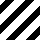
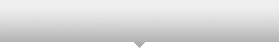
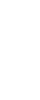
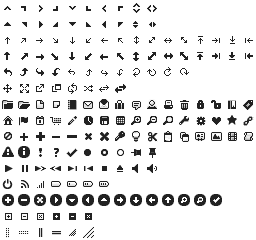
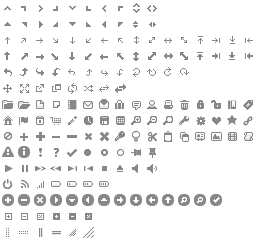
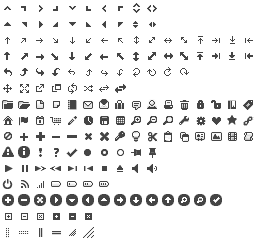
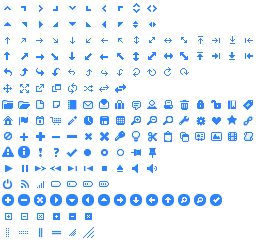
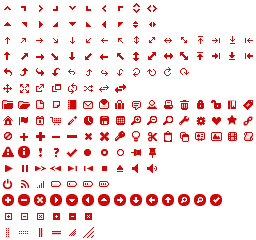
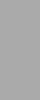
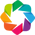
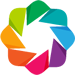
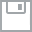
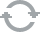
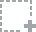
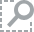
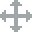
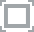
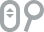

In [21]:
kernel.display.html(document.fragment.preamble.toString)

In [22]:
kernel.display.html(document.fragment.html.toString)

## Relevant Tweets

In [23]:
// We're looking at daily activities
val timeScale : ActivityFrequency.TimeScale.Value = ActivityFrequency.TimeScale.DAILY

val targetFiles = "/user/cbuntain/paris_nov"
val twitterStrings = sc.textFile(targetFiles).repartition(3000)

// Convert each JSON line in the file to a status using Twitter4j
//  Note that not all lines are Status lines, so we catch any exception
//  generated during this conversion and set to null since we don't care
//  about non-status lines.'
val tweets = twitterStrings.map(line => {
    try {
      TwitterObjectFactory.createStatus(line)
    } catch {
      case e : Exception => null
    }
  }).filter(status => status != null)

val relevantDatedCounts = ActivityFrequency.activityCounter(tweets, timeScale)
val relevantDatedCountsMap = relevantDatedCounts.collectAsMap()


val timeScale : UniqueUserFrequency.TimeScale.Value = UniqueUserFrequency.TimeScale.DAILY
val relevantDatedUserCounts = UniqueUserFrequency.userCounter(tweets, timeScale)
val relevantDatedUserCountsMap = relevantDatedUserCounts.collectAsMap()

In [28]:
val dateList = relevantDatedCountsMap.keys.toList.sorted

object distSource extends ColumnDataSource {
    val dates = column(dateList.map(d => d.getTime.asInstanceOf[Double]))
    val tCount= column(dateList.map(d => relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
    val tweets= column(dateList.map(d => relevantDatedCountsMap(d)._1.asInstanceOf[Double] / datedCountsMap(d)._1.asInstanceOf[Double]))
    val rt    = column(dateList.map(d => relevantDatedCountsMap(d)._2.asInstanceOf[Double] / relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
    val ments = column(dateList.map(d => relevantDatedCountsMap(d)._3.asInstanceOf[Double] / relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
    val urls  = column(dateList.map(d => relevantDatedCountsMap(d)._4.asInstanceOf[Double] / relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
    val media = column(dateList.map(d => relevantDatedCountsMap(d)._5.asInstanceOf[Double] / relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
    val tags  = column(dateList.map(d => relevantDatedCountsMap(d)._6.asInstanceOf[Double] / relevantDatedCountsMap(d)._1.asInstanceOf[Double]))
}

In [29]:
val xdr = new DataRange1d()
val ydr = new DataRange1d().start(0.0).end(1.0)

val distPlot = new Plot().x_range(xdr).y_range(ydr).extra_y_ranges(Map("foo" -> new DataRange1d().start(0).end(200000)))
distPlot.width(800)
distPlot.title("Distribution of Activity")

val xTick = new DatetimeTicker().desired_num_ticks(10)
val yForm = new NumeralTickFormatter().format("0.0")
val xaxis = new DatetimeAxis().ticker(xTick).plot(distPlot)
val yaxis = new LinearAxis().formatter(yForm).plot(distPlot)
val rightYaxis = new LinearAxis().formatter(yForm).plot(distPlot).y_range_name("foo")

val gridX = new Grid().plot(distPlot).dimension(0).ticker(xaxis.ticker.value)
val gridY = new Grid().plot(distPlot).dimension(1).ticker(yaxis.ticker.value)

distPlot.below <<= (xaxis :: _)
distPlot.left <<= (yaxis :: _)
distPlot.right <<= (rightYaxis :: _)

val dataList = List((distSource.tweets, Color.Blue, "Tweets"), (distSource.rt, Color.Blue, "Retweets"), (distSource.ments, Color.Red, "Mentions"), (distSource.urls, Color.Yellow, "URLs"), (distSource.media, Color.Green, "Media"), (distSource.tags, Color.Orange, "Hashtags"))
var rendList = List[io.continuum.bokeh.GlyphRenderer]()
var legendList = List[(String, List[io.continuum.bokeh.GlyphRenderer])]()

for (dataTuple <- dataList) {
    val xData = distSource.dates
    val yData = dataTuple._1
    val color = dataTuple._2
    val name = dataTuple._3
    
    val line = new Line().x(xData).y(yData).line_color(color)
    val rendLine = new GlyphRenderer().data_source(distSource).glyph(line)
    
    rendList = rendList :+ rendLine
    legendList = legendList :+ (name -> List(rendLine))
}

val circle = new Circle().x(eventSource.x).y(eventSource.y).fill_color(Color.Red).size(10)
val eventCircle = new GlyphRenderer().data_source(eventSource).glyph(circle)
rendList = rendList :+ eventCircle
legendList = legendList :+ ("Event" -> List(eventCircle))

val countLine = new Line().x(distSource.dates).y(distSource.tCount).line_color(Color.Black)
val rendCountLine = new GlyphRenderer().data_source(distSource).glyph(countLine).y_range_name("foo")
rendList = rendList :+ rendCountLine

val legend = new Legend().plot(distPlot).legends(legendList)
val pantool = new PanTool().plot(distPlot)
val previewTool = new PreviewSaveTool().plot(distPlot)

distPlot.renderers <<= (rendList ++ _)
distPlot.renderers <<= (xaxis :: yaxis :: gridX :: gridY :: _)
distPlot.renderers <<= (legend :: rightYaxis :: _)

distPlot.tools := List(pantool, previewTool)

val document = new Document(distPlot)


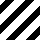
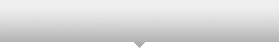
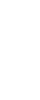
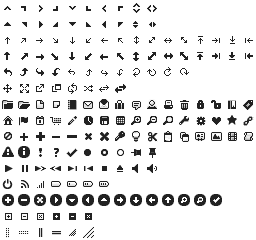
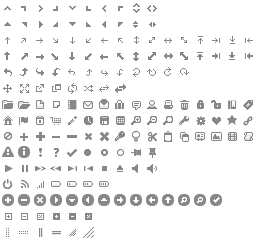
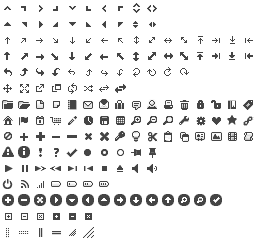
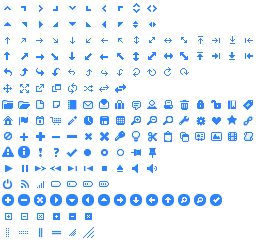
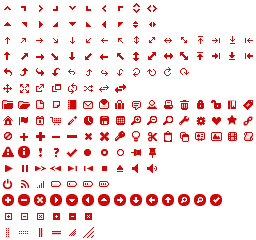
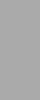
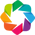
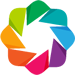
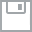
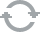
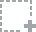
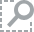
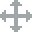
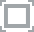
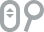

In [30]:
kernel.display.html(document.fragment.preamble.toString)

In [31]:
kernel.display.html(document.fragment.html.toString)